In [1]:
pip --version

pip 20.0.2 from /Users/jbanerje/opt/anaconda3/lib/python3.7/site-packages/pip (python 3.7)
Note: you may need to restart the kernel to use updated packages.


In [2]:
%%capture
pip install prometheus-api-client

In [3]:
%%capture
pip install matplotlib

In [68]:
from prometheus_api_client import *
import prometheus_api_client
from prometheus_api_client.utils import parse_datetime, parse_timedelta
import matplotlib.pyplot as plt
import os
import numpy as np
import sys
import datetime
import pandas
# import seaborn as sns
# # Set default Seaborn style
# sns.set(style="darkgrid")
# sns.set_context("talk", font_scale=1.4)
## hides ipython warnings
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (30, 10)
#plt.rcParams['figure.figsize'] = (20, 5)

In [54]:
print(prometheus_api_client.__version__)

0.4.1


In [55]:
# PROM URL is expected in this env variable
# like "https://prometheus-k8s-openshift-monitoring.apps.xxx.yyy.com/"
#url = os.environ.get("PROM_URL")
#url = "http://thanos-query-frontend.apps.bm.rdu2.scalelab.redhat.com/"
#url = "https://multicloud-console.apps.bm.rdu2.scalelab.redhat.com/observability-query/"
##url = "https://prometheus-k8s-openshift-monitoring.apps.bm.rdu2.scalelab.redhat.com/"
#########url = "http://thanos-query-frontend.apps.jbanerje-48fc8-tnsz2.dev05.red-chesterfield.com/"
url = "https://prometheus-k8s-openshift-monitoring.apps.playback-next.demo.red-chesterfield.com//"
#url = "https://prometheus-k8s-openshift-monitoring.apps.jbanerje-48fc8-lmvt9.dev05.red-chesterfield.com/"
# token: oc whoami --show-token
#token = os.environ.get("TOKEN")
token = "dummy_token"
#connects to prometheus
pc = PrometheusConnect(url=url, headers={"Authorization": "Bearer {}".format(token)}, disable_ssl=True);

### Sets the time range and time step for all queries below

In [56]:
start_time=(datetime.datetime.now() - datetime.timedelta(minutes=5760))
end_time=datetime.datetime.now()
step='1m'

In [57]:

cluster_cpu = pc.custom_query_range(
    query='cluster:cpu_usage_cores:sum',
    start_time=start_time,
    end_time=end_time,
    step=step,
)
print(type(cluster_cpu))

cluster_cpu_df = MetricRangeDataFrame(cluster_cpu);
cluster_cpu_df["value"]=cluster_cpu_df["value"].astype(float)
cluster_cpu_df.index= pandas.to_datetime(cluster_cpu_df.index, unit="s")
cluster_cpu_df.reset_index(inplace=True)
#cluster_cpu_df.plot(title="Srujan's Master Stroke")


<class 'list'>


In [58]:
cluster_cpu_df.head()

,timestamp,__name__,value
0,2022-05-27 13:56:56,cluster:cpu_usage_cores:sum,11.679429
1,2022-05-27 13:57:56,cluster:cpu_usage_cores:sum,11.329857
2,2022-05-27 13:58:56,cluster:cpu_usage_cores:sum,11.312000
3,2022-05-27 13:59:56,cluster:cpu_usage_cores:sum,11.311524
4,2022-05-27 14:00:56,cluster:cpu_usage_cores:sum,11.704857


### Refer to this to add addons for jupiter-lab https://plotly.com/python/getting-started/#jupyterlab-support

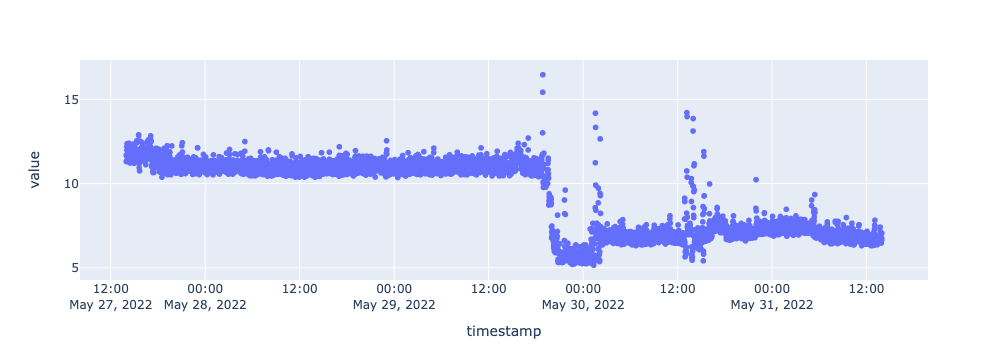

In [59]:
import plotly.express as px
fig = px.scatter(cluster_cpu_df, x="timestamp", y="value")
fig.show()

In [60]:
cluster_memory = pc.custom_query_range(
    query='cluster:memory_usage_bytes:sum',
    start_time=start_time,
    end_time=end_time,
    step=step,
)
cluster_memory_df = MetricRangeDataFrame(cluster_memory);
cluster_memory_df = MetricRangeDataFrame(cluster_memory);
cluster_memory_df["value"]=cluster_memory_df["value"].astype(float)
cluster_memory_df.index= pandas.to_datetime(cluster_memory_df.index, unit="s")
cluster_memory_df.reset_index(inplace=True)

In [61]:
cluster_memory_df.head()

,timestamp,__name__,value
0,2022-05-27 13:56:56,cluster:memory_usage_bytes:sum,8.083803e+10
1,2022-05-27 13:57:56,cluster:memory_usage_bytes:sum,8.040192e+10
2,2022-05-27 13:58:56,cluster:memory_usage_bytes:sum,8.048433e+10
3,2022-05-27 13:59:56,cluster:memory_usage_bytes:sum,8.055119e+10
4,2022-05-27 14:00:56,cluster:memory_usage_bytes:sum,8.056767e+10


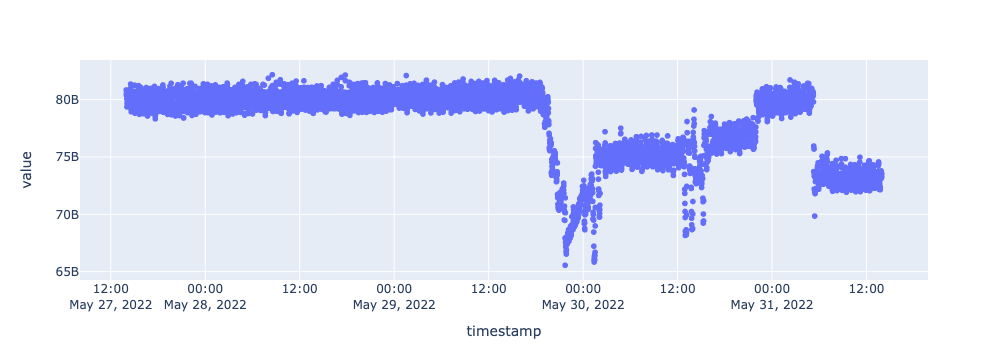

In [62]:
fig2 = px.scatter(cluster_memory_df, x="timestamp", y="value")
fig2.show()

In [52]:
cluster_met = pc.custom_query_range(
    query="union(cluster:cpu_usage_cores:sum,cluster:memory_usage_cores:sum)",
    start_time=start_time,
    end_time=end_time,
    step=step,
)
print(type(cluster_met))

cluster_met_df = MetricRangeDataFrame(cluster_met);
cluster_met_df["value"]=cluster_met_df["value"].astype(float)
cluster_met_df.index= pandas.to_datetime(cluster_met_df.index, unit="s")
cluster_met_df.reset_index(inplace=True)

PrometheusApiClientException: HTTP Status Code 400 (b'{"status":"error","errorType":"bad_data","error":"1:1: parse error: unknown function with name \\"union\\""}')

In [ ]:
#cluster:capacity_memory_bytes:sum

In [73]:
chunk_size = parse_timedelta("now", "1d")
cluster_mem_ranged_data = pc.get_metric_range_data(
    metric_name="cluster:capacity_cpu_cores:sum",
    start_time=start_time,
    end_time=end_time,
    chunk_size=chunk_size,
)

In [80]:
for metric in cluster_mem_ranged_data:
    print(metric["metric"], "\n")

{'__name__': 'cluster:capacity_cpu_cores:sum', 'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhcos'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', 'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhcos', 'label_node_role_kubernetes_io': 'master'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', 'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhcos'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', 'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhcos', 'label_node_role_kubernetes_io': 'master'} 

{'__name__': 'cluster:capacity_cpu_cores:sum', 'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhco

In [75]:
print(len(cluster_mem_ranged_data))
metrics_object_list = MetricsList(cluster_mem_ranged_data)

8


In [81]:
for item in metrics_object_list:
    print(type(item))

<class 'prometheus_api_client.metric.Metric'>
<class 'prometheus_api_client.metric.Metric'>


In [83]:
for item in metrics_object_list:
    print(item)
    #print(item.metric_name, item.label_config, "\n")

{
metric_name: 'cluster:capacity_cpu_cores:sum'
label_config: {'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhcos'}
metric_values:                                  ds   y
0     2022-05-27 13:57:20.381999872  24
1     2022-05-27 13:57:50.381999872  24
2     2022-05-27 13:58:20.381999872  24
3     2022-05-27 13:58:50.381999872  24
4     2022-05-27 13:59:20.381999872  24
...                             ...  ..
11515 2022-05-31 13:54:50.381999872  24
11516 2022-05-31 13:55:20.381999872  24
11517 2022-05-31 13:55:50.381999872  24
11518 2022-05-31 13:56:20.381999872  24
11519 2022-05-31 13:56:50.381999872  24

[11520 rows x 2 columns]
}
{
metric_name: 'cluster:capacity_cpu_cores:sum'
label_config: {'label_beta_kubernetes_io_instance_type': 'm5.2xlarge', 'label_kubernetes_io_arch': 'amd64', 'label_node_openshift_io_os_id': 'rhcos', 'label_node_role_kubernetes_io': 'master'}
metric_values:                        